In [1]:
from simulator import *
from algorithms import *
from algorithms_2 import *
from MCTS import *

In [2]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [ ]:
map = make_map(map_str=lava_maze, n_apples=5)
print(map)

Placing 5 apples between (1, 2) and (16, 9)
Placed apple at: (15, 8)
Placed apple at: (12, 6)
Placed apple at: (12, 9)
Placed apple at: (10, 4)
Placed apple at: (15, 9)

MAZE: "mylevel", ' '
FLAGS:hardfloor
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
ENDMAP
REGION:(0,0,17,11),lit,"ordinary"
BRANCH:(1,1,1,1),(0,0,0,0)
OBJECT:('%',"apple"),(15, 8)
OBJECT:('%',"apple"),(12, 6)
OBJECT:('%',"apple"),(12, 9)
OBJECT:('%',"apple"),(10, 4)
OBJECT:('%',"apple"),(15, 9)
STAIR:(15, 9),down



In [4]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -----------------                                 
                              |@.}....}....}..|                                 
                              |..}..}}}..}.}}.|                                 
                              |..}..}.......}.|                                 
                              |.....}...%.}...|                                 
                              |..}....}....}..|                                 
                           

In [5]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

Action taken: DOWN
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.3500000000000003
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @                                             
                                 **                                            
                                  *                               

1.3500000000000003

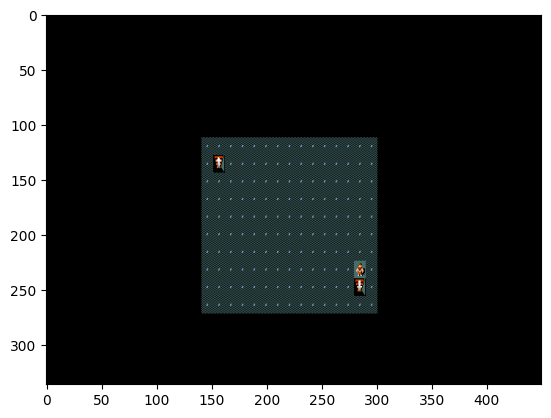

In [ ]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=50000
)

Action taken: UP
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                ...............                                
                                .@.............                                
                                .**............                                
                                ..*............                                
                                ..*............                                
                       

-0.050000000000000044

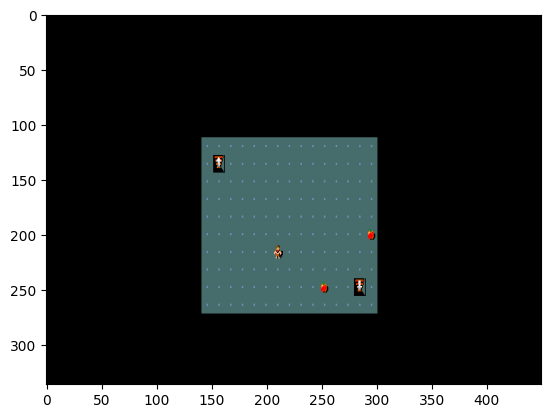

In [ ]:
# Monte Carlo Tree Search with heuristic
simulate_with_heuristic(
    env, mcts, iterations=50000, policy=heuristic_rollout_policy,
)

In [ ]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_path_planner, apple_reward=7.5,
    beam_width=5
)

Action taken: DOWN
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.0500000000000003
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @                                             
                                 ******                                        
                                      ****** *                    

1.0500000000000003

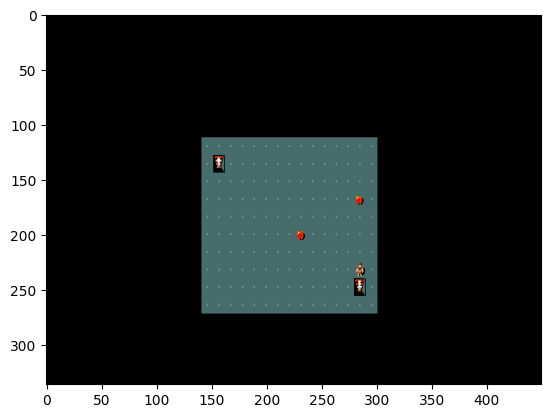

In [5]:
# Potential fields
simulate_with_heuristic(
    env, potential_field_path
)